In [2]:
dataFolder = '../../Data/plaintext_articles/'
dataFolder2 = 'Data/wikispeedia_paths-and-graph/'
from sklearn.feature_extraction.text import CountVectorizer
import os 
import numpy as np
from sklearn import metrics
import pandas as pd
from urllib.parse import unquote
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
people_skin_color = pd.read_csv(dataFolder2 + 'ethnic_category.tsv', header=1, sep= '\t' )
people_skin_color.columns = ['Category', 'People', 'Skin Color']
people_skin_color['People'] = people_skin_color['People'].map(lambda x : x.replace("%20", "_"))
people_skin_color.reset_index()

,index,Category,People,Skin Color
0,0,subject.People.Historical_figures,%C3%93engus_I_of_the_Picts,White
1,1,subject.People.Historical_figures,Abbas_I_of_Persia,Arab-Persian-Bizantin
2,2,subject.People.Historical_figures,Adam_Smith,White
3,3,subject.People.Historical_figures,Adriaen_van_der_Donck,White
4,4,subject.People.Historical_figures,Agamemnon,White
...,...,...,...,...
706,706,subject.People.Computing_People,Jimmy_Wales,White
707,707,subject.People.Computing_People,Linus_Torvalds,White
708,708,subject.People.Computing_People,Richard_Stallman,White
709,709,subject.People.Computing_People,Tim_Berners-Lee,White


In [4]:
corpus = []
titles =[]
for title in people_skin_color['People'] : 
    corpus.append(dataFolder+title+'.txt')
    titles.append(title)
len(corpus)

711

In [5]:
df = pd.DataFrame(data = titles, columns = ['People'])
df['People'] = df['People'].map(lambda x : unquote(x,'utf-8'))
df['Skin Color'] = people_skin_color['Skin Color']
df

,People,Skin Color
0,Óengus_I_of_the_Picts,White
1,Abbas_I_of_Persia,Arab-Persian-Bizantin
2,Adam_Smith,White
3,Adriaen_van_der_Donck,White
4,Agamemnon,White
...,...,...
706,Jimmy_Wales,White
707,Linus_Torvalds,White
708,Richard_Stallman,White
709,Tim_Berners-Lee,White


In [6]:
#BAG OF WORDS MATRIX
vectorizer = CountVectorizer(input='filename', encoding='utf-8')
X = vectorizer.fit_transform(corpus)
X#only tokenization and counting, not TF-IDF

<711x78471 sparse matrix of type '<class 'numpy.int64'>'
	with 884523 stored elements in Compressed Sparse Row format>

In [7]:
X.shape #bag of words matrix with 711 row(#documents) and 78471 columns(#différents words)

(711, 78471)

In [8]:
#TF_IDF Matrix

In [9]:
tdfVectorizer = TfidfVectorizer(
    input = 'filename',
    max_df=0.5,
    min_df=1,
    stop_words="english",
)

Y = tdfVectorizer.fit_transform(corpus)
Y#TF-IDF bow matrix

<711x77998 sparse matrix of type '<class 'numpy.float64'>'
	with 700406 stored elements in Compressed Sparse Row format>

In [10]:
print(Y.shape)
print(Y)

(711, 77998)
  (0, 2908)	0.015055359120899356
  (0, 12561)	0.009524284951474173
  (0, 4195)	0.007118442160025176
  (0, 19206)	0.006445083727755745
  (0, 36181)	0.012311942914620837
  (0, 60197)	0.0075002573317228425
  (0, 63536)	0.004421396920779496
  (0, 16173)	0.010368844318745326
  (0, 40905)	0.006259912139426164
  (0, 3617)	0.005720548505529771
  (0, 56885)	0.006052987351812724
  (0, 29543)	0.010012945336875892
  (0, 47823)	0.004447110239471182
  (0, 16385)	0.00599978896699129
  (0, 67314)	0.005431987955103369
  (0, 9432)	0.008495027537335309
  (0, 77153)	0.015055359120899356
  (0, 55113)	0.005153128311394634
  (0, 9375)	0.006977109737794725
  (0, 57248)	0.005720548505529771
  (0, 23061)	0.005629919331793994
  (0, 28847)	0.015055359120899356
  (0, 34704)	0.00449946075986367
  (0, 14246)	0.006793418306656927
  (0, 6557)	0.007118442160025176
  :	:
  (710, 19400)	0.02431101532787587
  (710, 63848)	0.02691465695993504
  (710, 1438)	0.04234799040757029
  (710, 54427)	0.06806821570187054

In [11]:
tdfVectorizer.vocabulary_

{'óengus': 77152,
 'picts': 53034,
 '1500': 767,
 'roman': 59698,
 'britain': 11693,
 'historical': 33496,
 'figures': 26937,
 'fergus': 26690,
 'image': 34948,
 'óengusmacfergusa': 77154,
 'jpg': 37887,
 'figure': 26934,
 'testament': 68828,
 'david': 19302,
 'shown': 63260,
 'killing': 38963,
 'lion': 41531,
 'st': 65505,
 'andrews': 5521,
 'sarcophagus': 61045,
 'represent': 58433,
 'dressed': 22363,
 'emperor': 24028,
 'antiquity': 5936,
 'wears': 74752,
 'fibula': 26844,
 'justinian': 38094,
 'mosaic': 46716,
 'san': 60853,
 'vitale': 73890,
 'ravenna': 57079,
 'reign': 57943,
 '732': 2517,
 '761': 2570,
 'buried': 12298,
 'predecessor': 54590,
 'nechtan': 47967,
 'der': 20243,
 'ile': 34866,
 'successor': 66807,
 'bridei': 11598,
 'issue': 36962,
 'talorgan': 68063,
 'hypothetical': 34569,
 'pictish': 53028,
 'onuist': 49914,
 'map': 43471,
 'urguist': 72616,
 'irish': 36740,
 'mac': 42616,
 'fergusso': 26692,
 'anglicisation': 5618,
 'angus': 5644,
 'reconstructed': 57475,
 'var

In [12]:
#sparsity of the matrix : 
print(f"{Y.nnz / np.prod(Y.shape):.3f}")

0.013


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=4, #pour l'instant on fait 4 clusters
    max_iter=100,
    n_init=100, #number of times the 
).fit(Y)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()


Number of elements assigned to each cluster: [478 122  44  67]



In [34]:
#Since TfidfVectorizer can be inverted we can identify the cluster centers,
#which provide an intuition of the most influential words for each cluster. 
print(len(kmeans.labels_))
kmeans.labels_

711


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3,
       3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 1, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
df_cluster = df.copy(deep = True)
df_cluster['clusters'] = kmeans.labels_
df_cluster = df_cluster.groupby(['clusters', 'Skin Color']).size().reset_index(name='counts')
df_cluster


,clusters,Skin Color,counts
0,0,Arab-Persian-Bizantin,22
1,0,Asian,26
2,0,Australian Aboriginal,1
3,0,Black,17
4,0,Hispanic,4
5,0,White,407
6,1,American Indian,1
7,1,Arab-Persian-Bizantin,1
8,1,Asian,7
9,1,Black,6


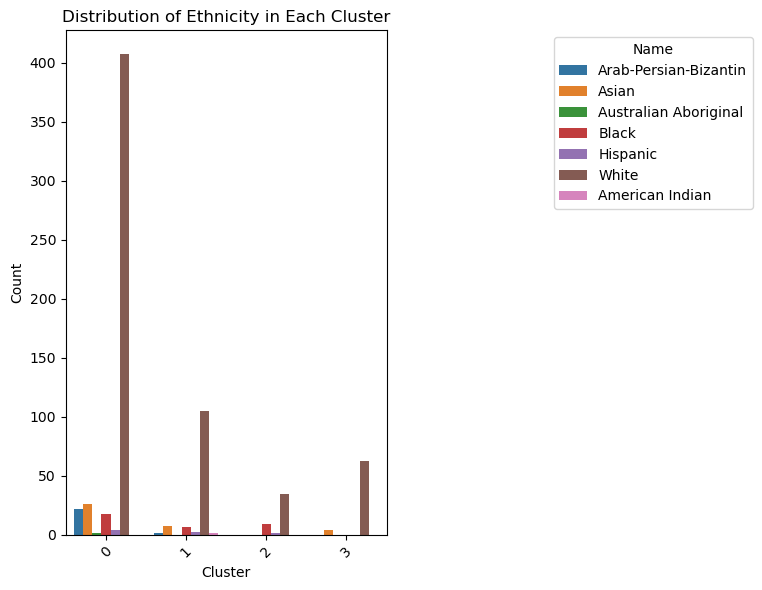

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters', y='counts', hue='Skin Color', data= df_cluster)
plt.title('Distribution of Ethnicity in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Name', bbox_to_anchor=(1.5, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
# no meaningful result when we use kmeans with tfidf, now we work with sentiment analysis

In [18]:
#NLP libraries
import spacy, nltk, gensim, sklearn


#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df['Positive_rate'] = [0 for i in range(len(df))]
df['Negative_rate'] = [0 for i in range (len(df))]
df['Compound_rate'] = [0 for i in range (len(df))]
df

/Users/mathisayma_1/anaconda3/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
0,Óengus_I_of_the_Picts,White,0,0,0
1,Abbas_I_of_Persia,Arab-Persian-Bizantin,0,0,0
2,Adam_Smith,White,0,0,0
3,Adriaen_van_der_Donck,White,0,0,0
4,Agamemnon,White,0,0,0
...,...,...,...,...,...
706,Jimmy_Wales,White,0,0,0
707,Linus_Torvalds,White,0,0,0
708,Richard_Stallman,White,0,0,0
709,Tim_Berners-Lee,White,0,0,0


In [19]:
df['Positive_rate'] = [0 for i in range(len(df))]
df['Negative_rate'] = [0 for i in range (len(df))]
df['Compound_rate'] = [0 for i in range (len(df))]
analyzer = SentimentIntensityAnalyzer()
for i in range(len(corpus)):
    with  open(corpus[i]) as page:
        page_score = analyzer.polarity_scores(page)
        df['Positive_rate'].iloc[i] = page_score.get('pos')
        df['Negative_rate'].iloc[i] = page_score.get('neg')
        df['Compound_rate'].iloc[i] = page_score.get('compound')

df

/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_57805/3269984851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_rate'].iloc[i] = page_score.get('pos')
/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_57805/3269984851.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.039' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Positive_rate'].iloc[i] = page_score.get('pos')
/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_57805/3269984851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
0,Óengus_I_of_the_Picts,White,0.039,0.090,-0.9986
1,Abbas_I_of_Persia,Arab-Persian-Bizantin,0.101,0.063,0.9935
2,Adam_Smith,White,0.159,0.058,0.9999
3,Adriaen_van_der_Donck,White,0.085,0.072,0.9619
4,Agamemnon,White,0.066,0.114,-0.9985
...,...,...,...,...,...
706,Jimmy_Wales,White,0.079,0.014,0.9986
707,Linus_Torvalds,White,0.092,0.019,0.9977
708,Richard_Stallman,White,0.138,0.058,0.9999
709,Tim_Berners-Lee,White,0.086,0.010,0.9981


In [71]:
mean_positive_white_rate = 0
mean_negative_white_rate = 0
mean_positive_other_rate = 0
mean_negative_other_rate = 0
for i in range (len(df)):
    if df['Skin Color'].iloc[i] =='White':
        mean_positive_white_rate += df['Positive_rate'].iloc[i]
        mean_negative_white_rate += df['Negative_rate'].iloc[i]
    else : 
        mean_positive_other_rate += df['Positive_rate'].iloc[i]
        mean_negative_other_rate += df['Negative_rate'].iloc[i]

mean_negative_other_rate = mean_negative_other_rate/(711-608)
mean_positive_other_rate = mean_positive_other_rate/(711-608)
mean_negative_white_rate = mean_negative_white_rate/608.0
mean_positive_white_rate = mean_positive_white_rate/608.0
        
print(mean_negative_other_rate)
print(mean_negative_white_rate)
print(mean_positive_other_rate)
print(mean_positive_white_rate)

0.0749417475728155
0.06730592105263153
0.09385436893203883
0.09417105263157899


In [ ]:
#negative rate of ethnicity other than White is larger than negative rate of White enthnicity
#statistic test to see if the p value is meaninful





In [40]:
people_skin_color['People'].map(lambda x : unquote(x,'utf-8'))
people_skin_color

,Category,People,Skin Color
0,subject.People.Historical_figures,%C3%93engus_I_of_the_Picts,White
1,subject.People.Historical_figures,Abbas_I_of_Persia,Arab-Persian-Bizantin
2,subject.People.Historical_figures,Adam_Smith,White
3,subject.People.Historical_figures,Adriaen_van_der_Donck,White
4,subject.People.Historical_figures,Agamemnon,White
...,...,...,...
706,subject.People.Computing_People,Jimmy_Wales,White
707,subject.People.Computing_People,Linus_Torvalds,White
708,subject.People.Computing_People,Richard_Stallman,White
709,subject.People.Computing_People,Tim_Berners-Lee,White


In [59]:
#remove cofounder category, we should try to match only white and other with same category : (sport player, politician,...)
import networkx as nx
#first we need to define a distance function for EXACT matching
#meaning if track_a != track_b or (score_before_avg_a != score_before_avg_b) we do not match


#MAYBE WE CAN BE EVEN MORE STRICT WITH THE MATCHING EN UTILISANT JUSTEMENT LES RATE POSITIVE ET NEGATIF POUR LES ETUDES STATISTIQUES
def get_similarity(category_a, category_b):
    if (category_a.item() == category_b.item()): 
        return 1 
    else: 
        return 0    



In [61]:
#Create a bipartite graph(G = AUB) with A = papers with rebutal,
# and B = papers without rebutal and edges = similarity between nodes
a = people_skin_color[people_skin_color['Skin Color'] == 'White']
b = people_skin_color[people_skin_color['Skin Color'] != 'White']


G = nx.Graph()

for i in a[['Category']].iterrows(): 
    category_a = i[1]
    for  j in b [['Category']].iterrows():
        category_b = j[1]
        similarity = get_similarity(category_a, category_b)
        if (similarity == 1):
            G.add_weighted_edges_from([(i[0], j[0], similarity)])

In [63]:
# the layout of the matching is : row[n] is matched with row[n+1] 
matching = nx.min_weight_matching(G)
matched = list()
for i in matching: 
    matched = matched + [i[0]] + [i[1]]

In [67]:
matched_df = df.iloc[matched]
matched_df

,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
78,Rudolf_Vrba,White,0.072,0.088,-0.9996
77,Rosa_Parks,Black,0.100,0.086,0.9991
355,Pope_John_Paul_II,White,0.107,0.080,0.9998
343,John_Sentamu,Black,0.048,0.039,0.6597
64,Louis_XIV_of_France,White,0.109,0.078,0.9999
...,...,...,...,...,...
162,Diego_Maradona,Hispanic,0.124,0.054,0.9999
419,"Robert_Gascoyne-Cecil,_3rd_Marquess_of_Salisbury",White,0.066,0.054,0.9658
407,Mahatma_Gandhi,Asian,0.109,0.126,-0.9997
94,William_Edington,White,0.077,0.039,0.9831


In [76]:
mean_positive_white_rate = 0
mean_negative_white_rate = 0
mean_positive_other_rate = 0
mean_negative_other_rate = 0
for i in range (len(matched_df)):
    if matched_df['Skin Color'].iloc[i] =='White':
        mean_positive_white_rate += matched_df['Positive_rate'].iloc[i]
        mean_negative_white_rate +=matched_df['Negative_rate'].iloc[i]
    else : 
        mean_positive_other_rate += matched_df['Positive_rate'].iloc[i]
        mean_negative_other_rate += matched_df['Negative_rate'].iloc[i]

mean_negative_other_rate = mean_negative_other_rate/103.0
mean_positive_other_rate = mean_positive_other_rate/103.0
mean_negative_white_rate = mean_negative_white_rate/103.0
mean_positive_white_rate = mean_positive_white_rate/103.0
        
print(mean_negative_other_rate)
print(mean_negative_white_rate)
print(mean_positive_other_rate)
print(mean_positive_white_rate)

0.07494174757281555
0.07679611650485436
0.09385436893203887
0.09657281553398064


In [ ]:
#resultat quasiment similaire
# We can maybe reply : Using the matched sample, estimate the following linear regression: negative rate ~ ethnicity.
#but won't be relevant at all, therefore maybe just use the rate for matching !!!!